In [1]:
# from __future__ import print_function

# from miscc.config import cfg, cfg_from_file
# from datasets import TextDataset
from trainer import JoImTeR as trainer
import pickle 
import os
import sys
import time
import math
import random
import pprint
import datetime
import dateutil.tz
import argparse
import numpy as np
import pandas as pd
from ast import literal_eval
pd.options.display.max_colwidth=0
from misc.config import Config
cfg = Config()
import json
from PIL import Image

from tqdm import tqdm
# import torch
# import torchvision.transforms as transforms

In [5]:
data_pkl = '/media/SStor1/zhanghex/MIMIC-CXR/lm_reports/mimic_dataset_mit_normalized.pkl'
label_csv = '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-chexpert.csv'

In [6]:
with open(data_pkl, 'rb') as f:
    dat = pickle.load(f)
dat.keys()

FileNotFoundError: [Errno 2] No such file or directory: '/media/SStor1/zhanghex/MIMIC-CXR/lm_reports/mimic_dataset_mit_normalized.pkl'

In [7]:
lab = pd.read_csv(label_csv)
lab

FileNotFoundError: [Errno 2] No such file or directory: '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-chexpert.csv'

In [36]:
from PIL import Image
import os
import shutil
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


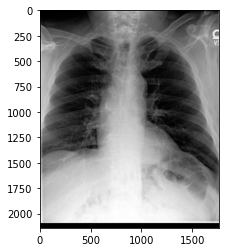

In [40]:
# imgp = '/media/My4TBHD1/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p16/p16321890/s57927034/b599d860-81cd5bda-b02dcacc-bde19af2-d9bd2408.jpg'

img = Image.open('/media/My4TBHD1/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/'+imgp)
plt.imshow(img, cmap='gray')

In [38]:
## generate fixing image cmd in terminal
imgp = 'files/p16/p16960594/s54565221/28192955-29a51fb7-b8d526d1-d03f7e88-1f2405af.jpg'

dl = 'wget -r -N -c -np --user mingchengao --ask-password https://physionet.org/files/mimic-cxr-jpg/2.0.0/%s' % imgp
cp1 = 'sudo cp physionet.org/files/mimic-cxr-jpg/2.0.0/%s /media/My1TBSSD1/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/%s' % (imgp, imgp)
cp2 = 'sudo cp physionet.org/files/mimic-cxr-jpg/2.0.0/%s /media/My4TBHD1/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/%s' % (imgp, imgp)

print(dl, '\n')
print(cp1, '\n')
print(cp2, '\n')

wget -r -N -c -np --user mingchengao --ask-password https://physionet.org/files/mimic-cxr-jpg/2.0.0/files/p16/p16960594/s54565221/28192955-29a51fb7-b8d526d1-d03f7e88-1f2405af.jpg 

sudo cp physionet.org/files/mimic-cxr-jpg/2.0.0/files/p16/p16960594/s54565221/28192955-29a51fb7-b8d526d1-d03f7e88-1f2405af.jpg /media/My1TBSSD1/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p16/p16960594/s54565221/28192955-29a51fb7-b8d526d1-d03f7e88-1f2405af.jpg 

sudo cp physionet.org/files/mimic-cxr-jpg/2.0.0/files/p16/p16960594/s54565221/28192955-29a51fb7-b8d526d1-d03f7e88-1f2405af.jpg /media/My4TBHD1/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p16/p16960594/s54565221/28192955-29a51fb7-b8d526d1-d03f7e88-1f2405af.jpg 



In [10]:
import numpy as np
import torch
import torch.nn as nn

In [21]:
similarity = []

In [29]:
sim = torch.tensor([[0.8, 0.2, 0.4, 0.9],[0.5, 0.6, 0.1, 0.8]])
gam = 4
sim = sim.mul_(gam).exp_()
sim = sim.sum(dim=1, keepdim=True)
sim = torch.log(sim)
sim
# similarity.append(sim)

tensor([[4.2240],
        [3.7941]])

In [15]:
similarity = torch.cat(similarity,1)

In [24]:
similarity

[tensor([[2.0013],
         [1.9172]]),
 tensor([[2.0013],
         [1.9172]])]

In [30]:
model = nn.Sequential(
    nn.Linear(4,2),
    nn.Linear(2,2)
)

model[0].requires_grad_(False)

Linear(in_features=4, out_features=2, bias=True)

In [31]:
model[0].bias.requires_grad

False

In [32]:

model.zero_grad()
xin = torch.rand(3,4)
xout = model(xin)

In [33]:
ls = (2.0 - xout)**2
ls = ls.mean()
ls.backward()

In [34]:
torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

tensor(3.5527)

In [35]:
model[0].weight.grad

In [7]:
from transformers import BertTokenizer
tokenizer_b = BertTokenizer.from_pretrained("bert-base-uncased")

In [4]:
tokenizer.batch_encode_plus(['hello qqqqqqqq how are you'])

{'input_ids': [[101, 7592, 1053, 4160, 4160, 4160, 4160, 4160, 4160, 4160, 2129, 2024, 2017, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [6]:
from transformers import AutoTokenizer, AutoModel
tokenizer_cb = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

In [ ]:
# from transformers import AutoTokenizer, AutoModel
# tokenizer_cb = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

In [11]:
import numpy as np
example_sent = 'the cardiac silhouette and mediastinum size are within normal limits  there is no pulmonary edema  there is no focal consolidation  there are no of a pleural effusion  there is no evidence of pneumothorax '

In [17]:
results_b = tokenizer_b.encode_plus(example_sent, max_length=128, padding='max_length', 
                                    return_attention_mask=True, return_token_type_ids=False, truncation=True)
np.array(results_b['input_ids'])

array([  101,  1996, 15050, 21776,  1998,  2865, 16643, 19172,  2946,
        2024,  2306,  3671,  6537,  2045,  2003,  2053, 21908,  3968,
       14545,  2045,  2003,  2053, 15918, 17439,  2045,  2024,  2053,
        1997,  1037, 20228, 11236,  2389,  1041,  4246, 14499,  2045,
        2003,  2053,  3350,  1997,  1052,  2638,  2819, 29288,  2527,
        2595,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [18]:
results_cb = tokenizer_cb.encode_plus(example_sent, max_length=128, padding='max_length', 
                                    return_attention_mask=True, return_token_type_ids=False, truncation=True)
np.array(results_cb['input_ids'])

array([  101,  1103, 17688, 27316,  1105,  2394,  2050,  1394,  1818,
        2060,  1132,  1439,  2999,  6263,  1175,  1110,  1185, 26600,
        5048, 14494,  1175,  1110,  1185, 17811, 20994,  1175,  1132,
        1185,  1104,   170,   185,  1513, 12602,   174,  3101, 17268,
        1175,  1110,  1185,  2554,  1104,   185,  1673,  1818, 12858,
       25632,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [19]:
np.array(tokenizer_cb.convert_ids_to_tokens(results_cb['input_ids']))

array(['[CLS]', 'the', 'cardiac', 'silhouette', 'and', 'media', '##st',
       '##in', '##um', 'size', 'are', 'within', 'normal', 'limits',
       'there', 'is', 'no', 'pulmonary', 'ed', '##ema', 'there', 'is',
       'no', 'focal', 'consolidation', 'there', 'are', 'no', 'of', 'a',
       'p', '##le', '##ural', 'e', '##ff', '##usion', 'there', 'is', 'no',
       'evidence', 'of', 'p', '##ne', '##um', '##oth', '##orax', '[SEP]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '

In [20]:
np.array(tokenizer_b.convert_ids_to_tokens(results_b['input_ids']))

array(['[CLS]', 'the', 'cardiac', 'silhouette', 'and', 'media', '##sti',
       '##num', 'size', 'are', 'within', 'normal', 'limits', 'there',
       'is', 'no', 'pulmonary', 'ed', '##ema', 'there', 'is', 'no',
       'focal', 'consolidation', 'there', 'are', 'no', 'of', 'a', 'pl',
       '##eur', '##al', 'e', '##ff', '##usion', 'there', 'is', 'no',
       'evidence', 'of', 'p', '##ne', '##um', '##otho', '##ra', '##x',
       '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
       '[PAD]', '